In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
cat_df = df.select_dtypes(include = 'object').columns
num_df = df.select_dtypes(include = ['int', 'float']).columns

In [6]:
df[cat_df].nunique()

country    167
dtype: int64

In [7]:
df[cat_df]

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


In [8]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [10]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


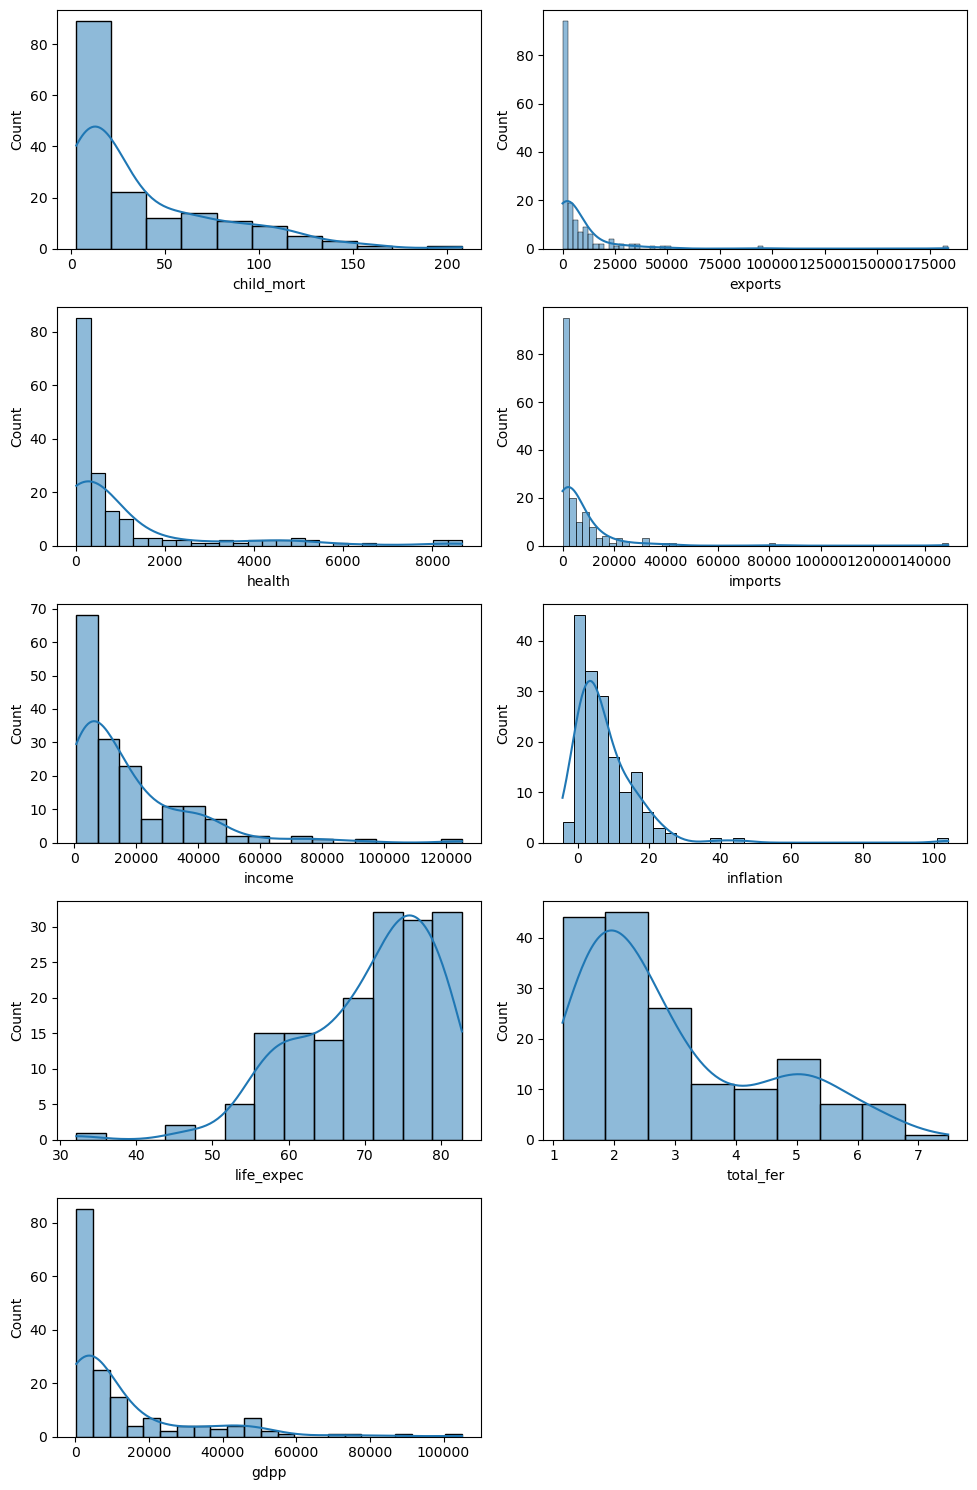

In [11]:
plt.figure(figsize=(10,15))
for i in df[num_df].columns:
    plt.subplot(5,2, df[num_df].columns.get_loc(i)+1)
    sns.histplot(x=df[i], kde= True)

plt.tight_layout()
plt.show()

In [12]:
df["life_expec"].min()

32.1

In [13]:
df["life_expec"].argmin()

66

In [14]:
df.iloc[66]

country         Haiti
child_mort      208.0
exports       101.286
health        45.7442
imports       428.314
income           1500
inflation        5.45
life_expec       32.1
total_fer        3.33
gdpp              662
Name: 66, dtype: object

In [15]:
df[num_df].skew()

child_mort    1.450774
exports       6.720171
health        2.526029
imports       6.618500
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [16]:
df[num_df].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


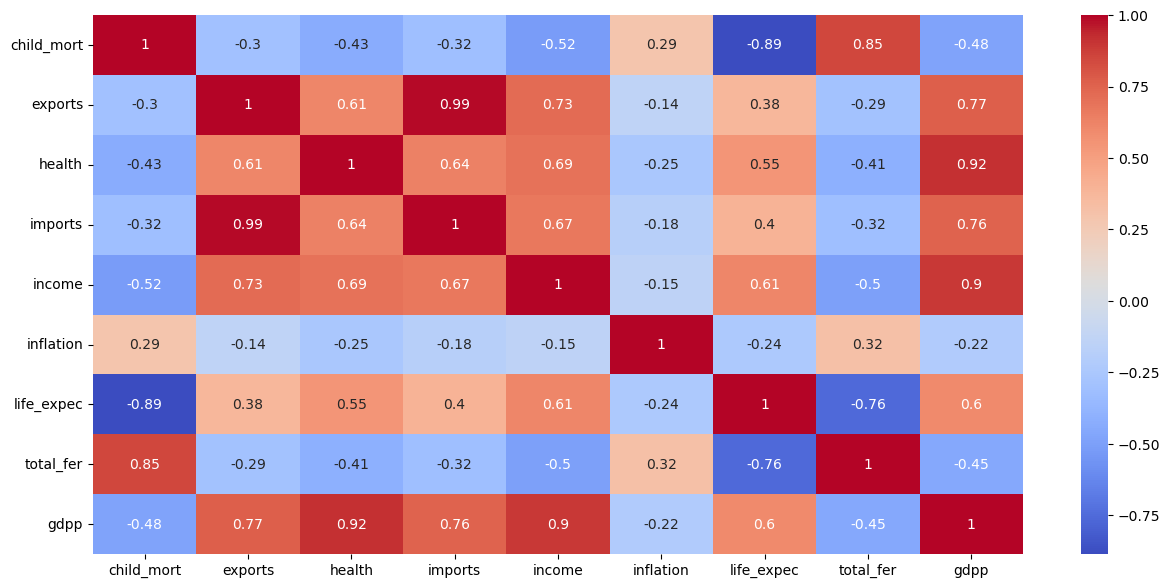

In [17]:
# Using heatmap to see the relationships
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_df].corr(),annot = True, cmap = "coolwarm")
plt.show()

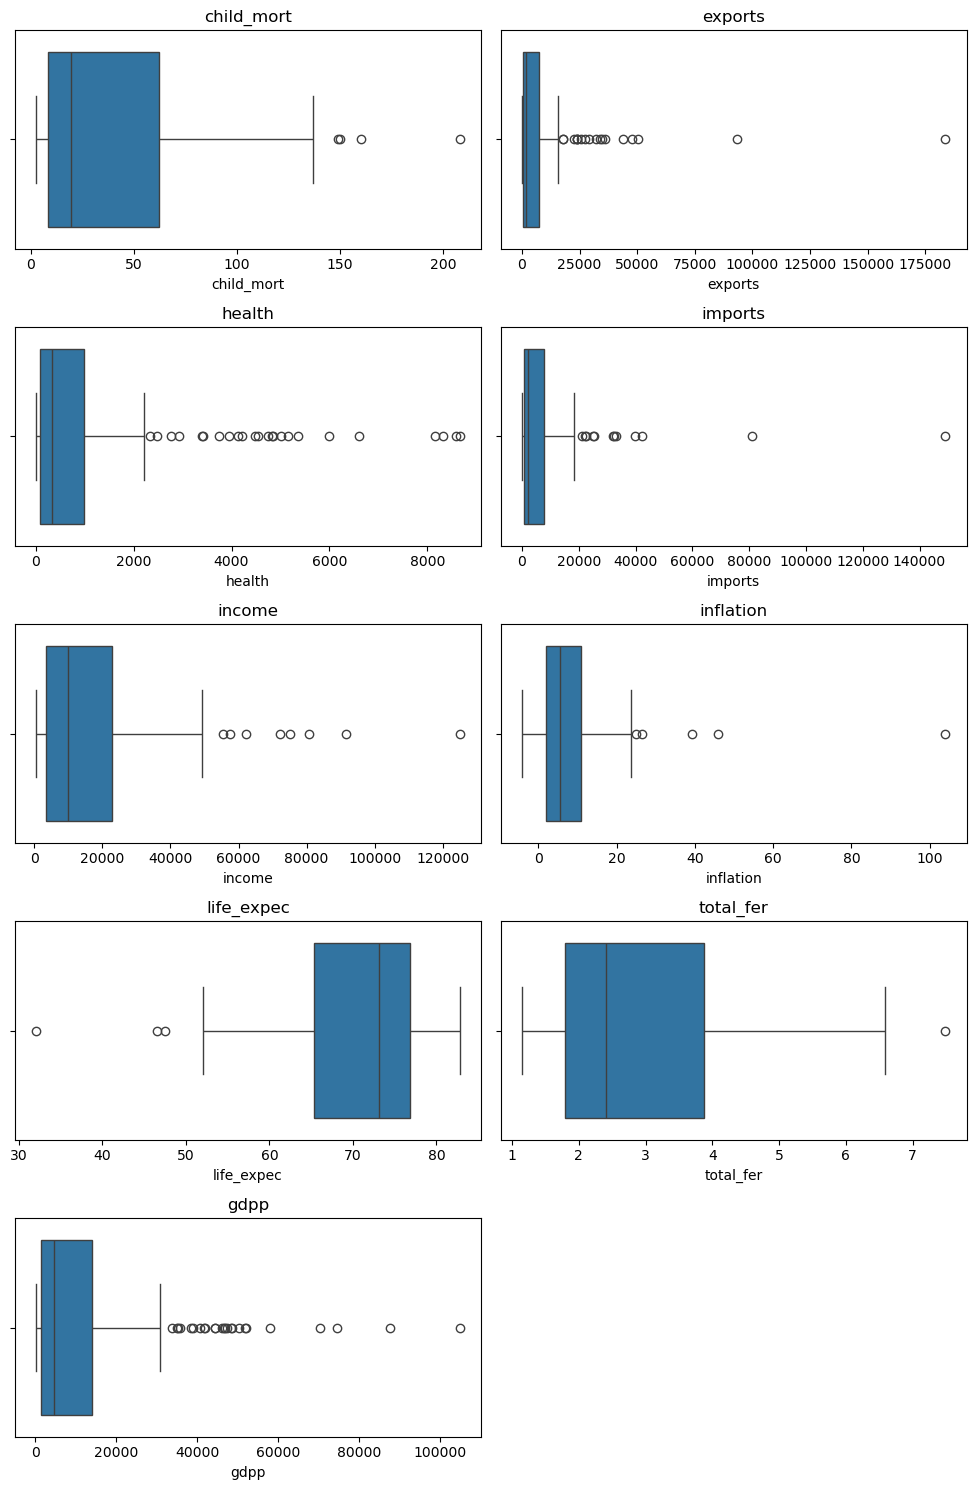

In [18]:
# Using box plot to see the distribution of each feature

plt.figure(figsize=(10, 15))

for col in df[num_df].columns:
    plt.subplot(5, 2, df[num_df].columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
df1=df.drop('country', axis =1) ## Droping string feature country name.
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df1)

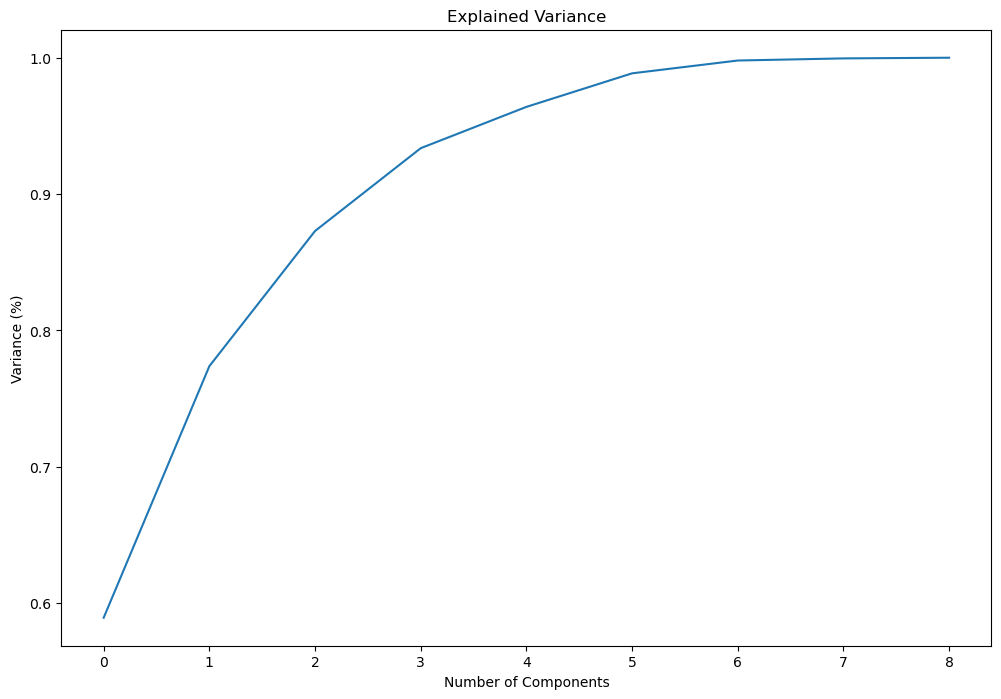

In [20]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
principalComponents = pca.fit_transform(df_scaled)
plt.figure(figsize= (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From above scree plot, Around 98% of the information is being explained by 4 components verified from above as well.

In [21]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df_scaled)
# This will be the new data fed to the algorithm.
colnames = list(df1.columns)
principal_Df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3]})
principal_Df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,exports,0.342887,0.397311,-0.030574,0.449425
2,health,0.358535,0.155053,-0.075703,-0.599712
3,imports,0.344865,0.370781,-0.072174,0.461798
4,income,0.380041,0.128384,0.145764,-0.154806
5,inflation,-0.143085,0.221261,0.948419,-0.007628
6,life_expec,0.343857,-0.369820,0.196752,-0.018395
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928
8,gdpp,0.399988,0.200624,0.010339,-0.364772


In [22]:
print(pca.explained_variance_)

[5.33631081 1.67006556 0.89740614 0.54979722]


In [23]:
print(pca.components_)

[[-0.31639186  0.34288671  0.358535    0.34486492  0.38004113 -0.14308531
   0.34385651 -0.30284224  0.39998795]
 [ 0.47626735  0.39731091  0.1550529   0.37078075  0.12838448  0.22126089
  -0.36981973  0.4597152   0.2006241 ]
 [-0.15001225 -0.03057367 -0.07570322 -0.07217386  0.14576421  0.94841868
   0.19675173 -0.07783431  0.01033941]
 [-0.14805195  0.44942527 -0.59971228  0.46179779 -0.15480592 -0.00762798
  -0.01839465 -0.21392805 -0.36477239]]


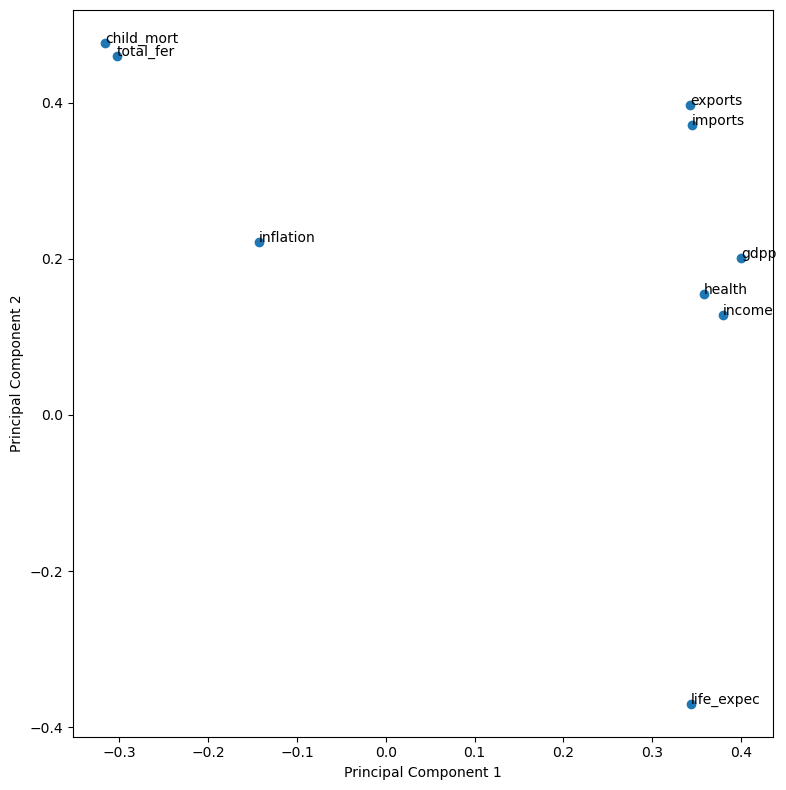

In [24]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(principal_Df.PC1, principal_Df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(principal_Df.Feature):
    plt.annotate(txt, (principal_Df.PC1[i],principal_Df.PC2[i]))
plt.tight_layout()
plt.show()

In [25]:
df_pca = pca.fit_transform(df_scaled)

In [26]:
df_pca.shape

(167, 4)

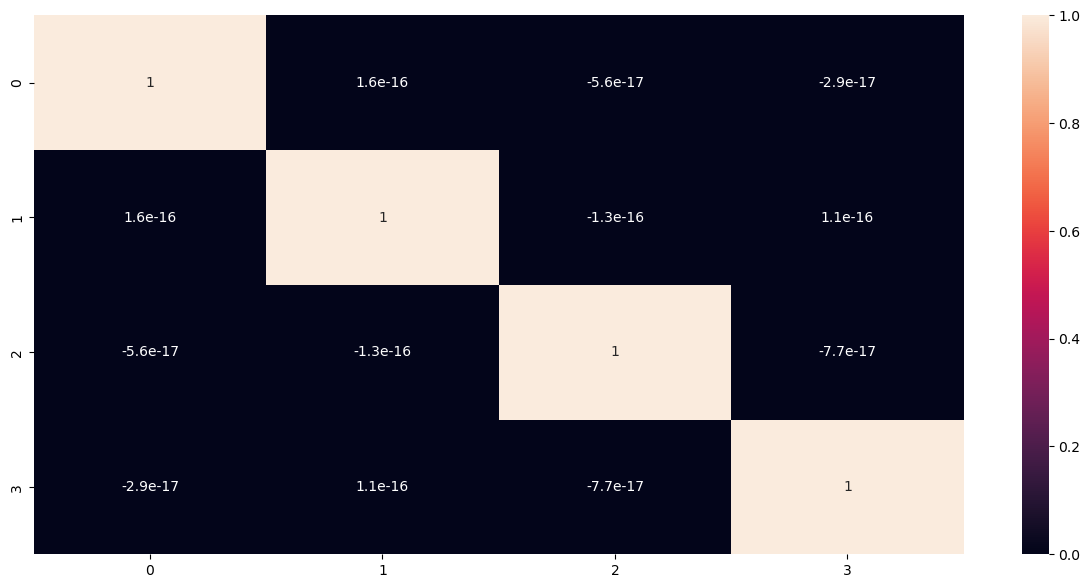

In [40]:
# Using heatmap to see the relationships
plt.figure(figsize=(15, 7))
sns.heatmap(np.corrcoef(df_pca.T),annot = True)
plt.show()

In [28]:
pca_df2 = pd.DataFrame(df_pca)


In [29]:
pca_df2.head()

,0,1,2,3
0,-2.635575,1.472267,-0.549489,-0.242326
1,-0.024206,-1.429892,-0.014123,0.450645
2,-0.459557,-0.675495,0.959355,0.218456
3,-2.722630,2.172332,0.600215,-0.433978
4,0.648597,-1.023437,-0.257430,0.289201


In [30]:
pca_df2.shape

(167, 4)

In [31]:
df_pca[12]

array([-1.01516655, -0.70874278, -0.10181692,  0.36813086])

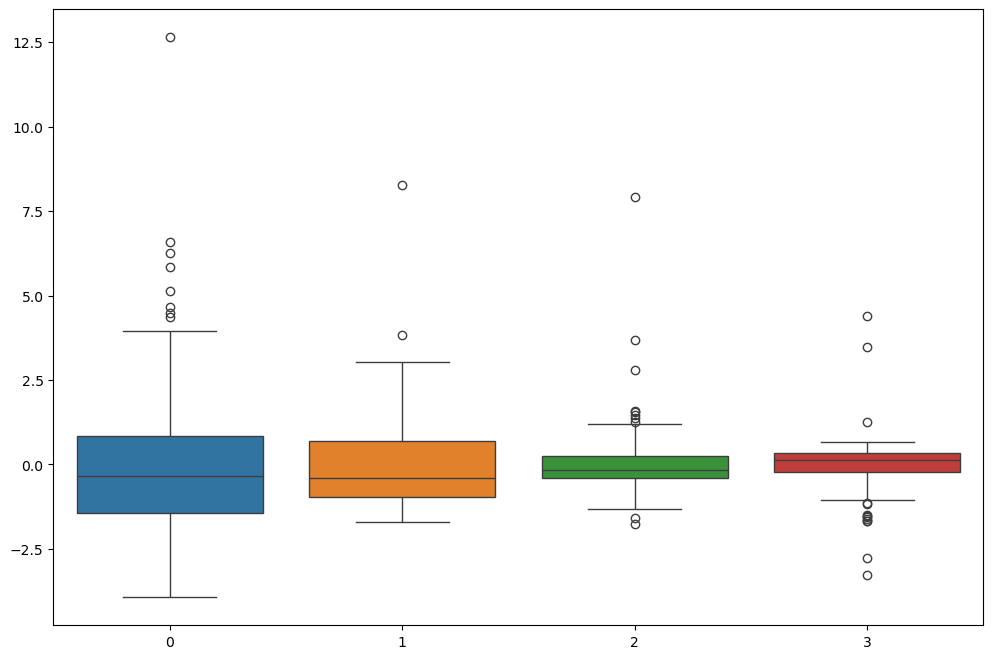

In [41]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pca_df2)
plt.show()

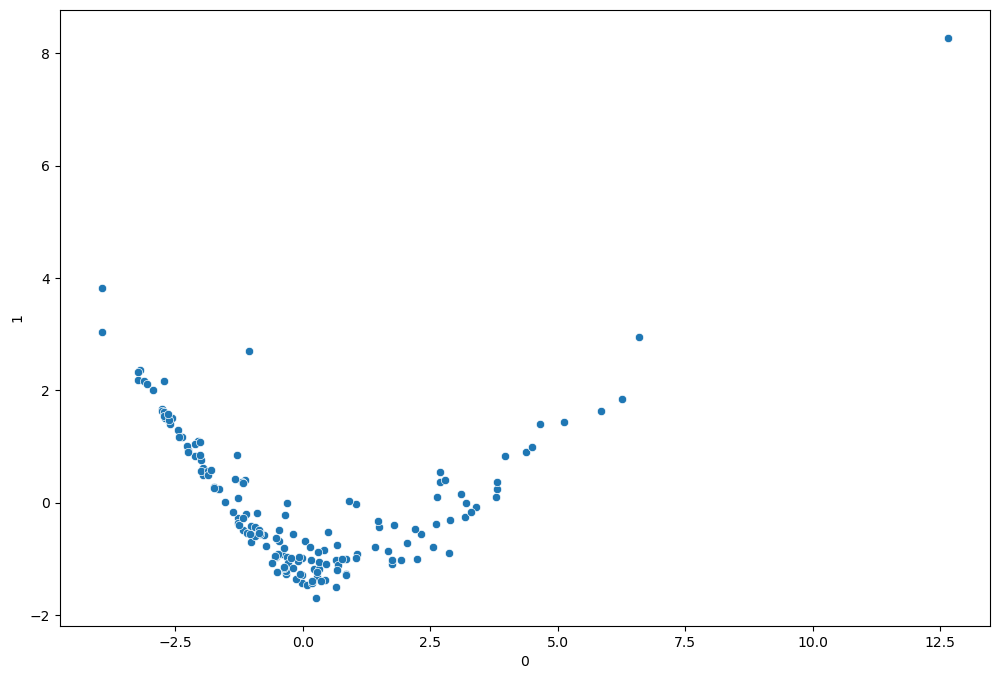

In [43]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x=0 ,y= 1,data=pca_df2)
plt.show()

In [44]:
df2 = pca_df2

#### Clustering Process

In [46]:
from sklearn.cluster import KMeans

Elbow Plot

In [47]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2)
    sse.append(km.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

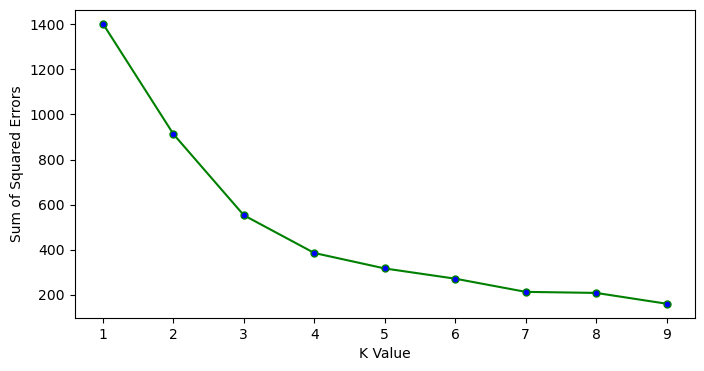

In [52]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,10), sse, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Errors");

Here, we can see a distict bend at K Value 3

In [53]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(df2)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3, random_state=50)

In [54]:
df3=pca_df2
df3.index = pd.RangeIndex(len(df3.index))
df_km = pd.concat([df3, pd.Series(model_clus2.labels_)], axis=1)
df_km

,0,1,2,3,0
0,-2.635575,1.472267,-0.549489,-0.242326,2
1,-0.024206,-1.429892,-0.014123,0.450645,1
2,-0.459557,-0.675495,0.959355,0.218456,1
3,-2.722630,2.172332,0.600215,-0.433978,2
4,0.648597,-1.023437,-0.257430,0.289201,1
...,...,...,...,...,...
162,-1.175210,-0.275652,-0.667131,0.279628,1
163,-0.314228,-0.016266,3.680273,0.011835,1
164,-0.594449,-1.076335,0.528875,0.508854,1
165,-1.802372,0.588729,1.180851,-0.020241,2


In [56]:
df_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
df_km

,PC1,PC2,PC3,PC4,ClusterID
0,-2.635575,1.472267,-0.549489,-0.242326,2
1,-0.024206,-1.429892,-0.014123,0.450645,1
2,-0.459557,-0.675495,0.959355,0.218456,1
3,-2.722630,2.172332,0.600215,-0.433978,2
4,0.648597,-1.023437,-0.257430,0.289201,1
...,...,...,...,...,...
162,-1.175210,-0.275652,-0.667131,0.279628,1
163,-0.314228,-0.016266,3.680273,0.011835,1
164,-0.594449,-1.076335,0.528875,0.508854,1
165,-1.802372,0.588729,1.180851,-0.020241,2


In [58]:
df_km['ClusterID'].value_counts()

ClusterID
1    91
2    48
0    28
Name: count, dtype: int64

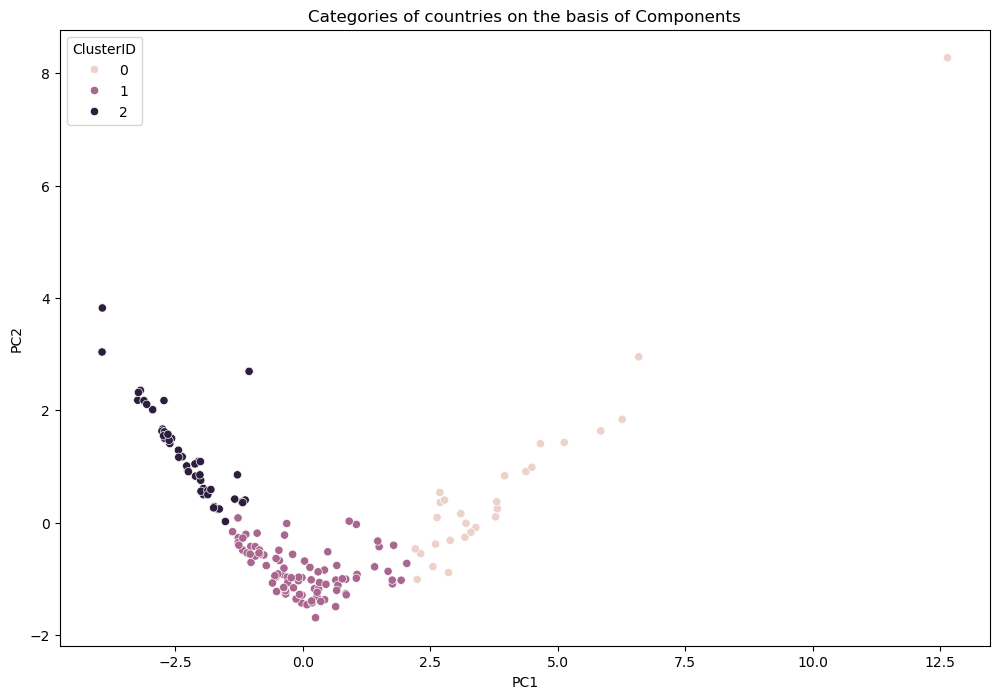

In [60]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df_km)

plt.title('Categories of countries on the basis of Components')
plt.show()


In [61]:
df4=pd.merge(df,df_km, left_index=True,right_index=True)
df4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,-0.242326,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.024206,-1.429892,-0.014123,0.450645,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,0.218456,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.722630,2.172332,0.600215,-0.433978,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,0.289201,1


In [64]:
df5=df4.drop(['PC1','PC2','PC3','PC4'],axis=1)
df5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [65]:
Cluster_GDPP=pd.DataFrame(df5.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(df5.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(df5.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(df5.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(df5.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(df5.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(df5.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(df5.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(df5.groupby(["ClusterID"]).total_fer.mean())

In [67]:
df6 = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

In [68]:
df6

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
1,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


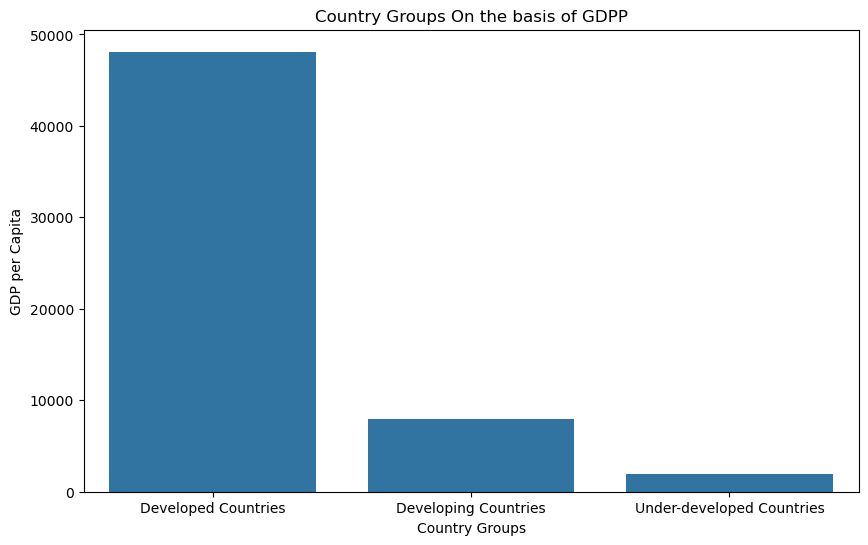

In [72]:
fig = plt.figure(figsize = (10,6))
df6.rename(index={0: 'Developed Countries'},inplace=True)
df6.rename(index={1: 'Developing Countries'},inplace=True)
df6.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df6.index,y='gdpp',data=df6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()

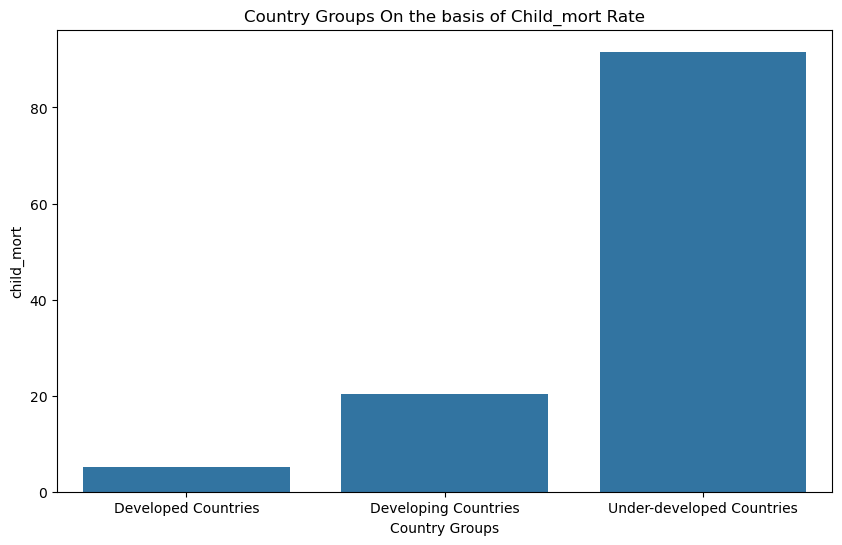

In [73]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df6.index,y='child_mort',data=df6)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()

In [74]:
fin=df[df['gdpp']<=1909]
fin=fin[fin['child_mort']>= 92]
fin=fin[fin['income']<= 3897.35]

In [75]:
fin_k=pd.merge(fin,df_km,left_index=True,right_index=True)

In [76]:
fin_k

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.363962,1.171696,-1.247192,-0.257106,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,-2.751480,1.664991,-0.848207,-0.345046,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.762440,1.628790,-0.299329,-0.309938,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,-2.438923,1.288278,-1.226104,-0.226851,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,-3.236946,2.178414,-1.602973,-0.337091,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,-3.185395,2.354073,-1.078613,-0.567728,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,-3.114930,2.170747,0.361477,-0.433233,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,-2.572195,1.497963,-0.955701,-0.244931,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648,-2.712585,1.614803,0.041301,-0.242720,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,-2.608159,1.406872,-1.195769,-0.215629,2


In [77]:
fin_k=fin_k.drop(['PC1','PC2','PC3','PC4'],axis=1)

In [78]:
fin_k.shape

(17, 11)

After merging, we are getting 17 under-developed countries, where gdpp, income are less but child_mort is more.

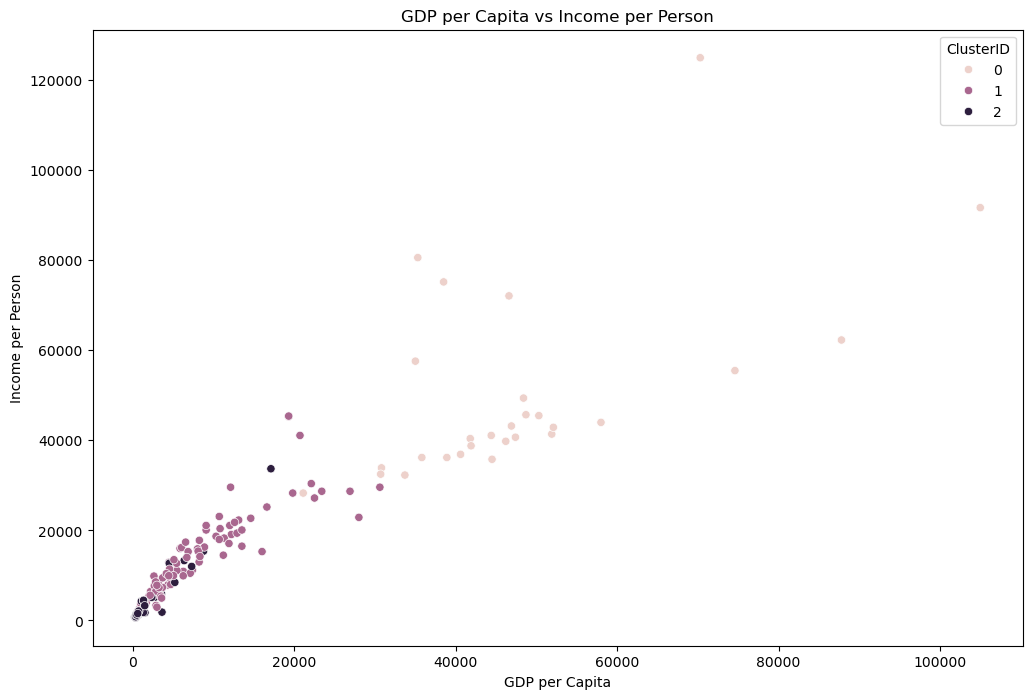

In [79]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=df5)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('GDP per Capita vs Income per Person')
plt.show()

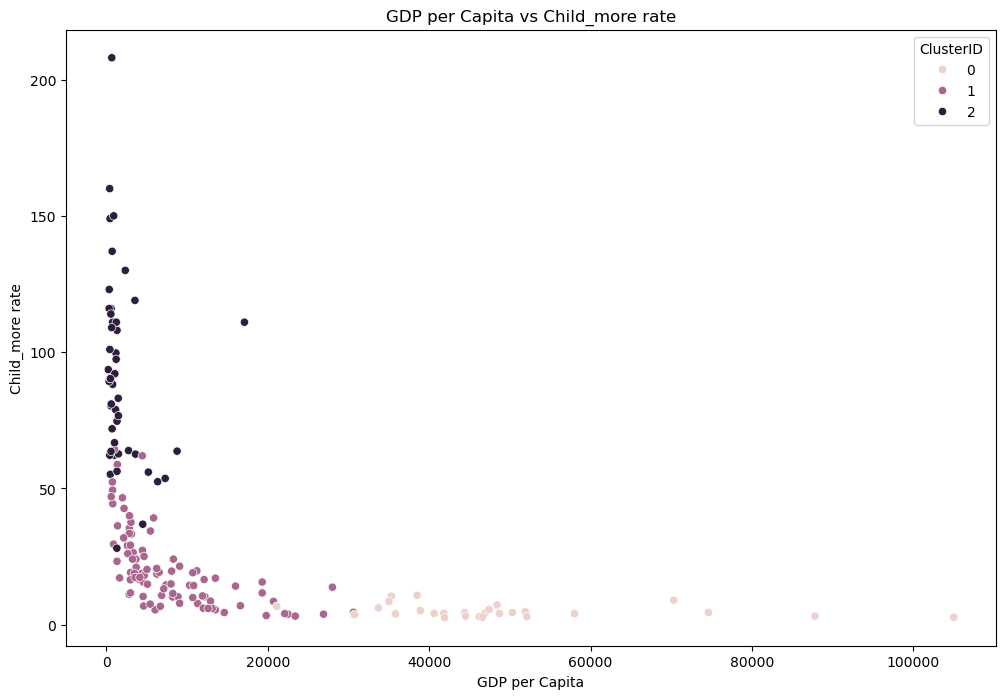

In [80]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=df5)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Child_more rate', fontsize=10)
plt.title('GDP per Capita vs Child_more rate')
plt.show()

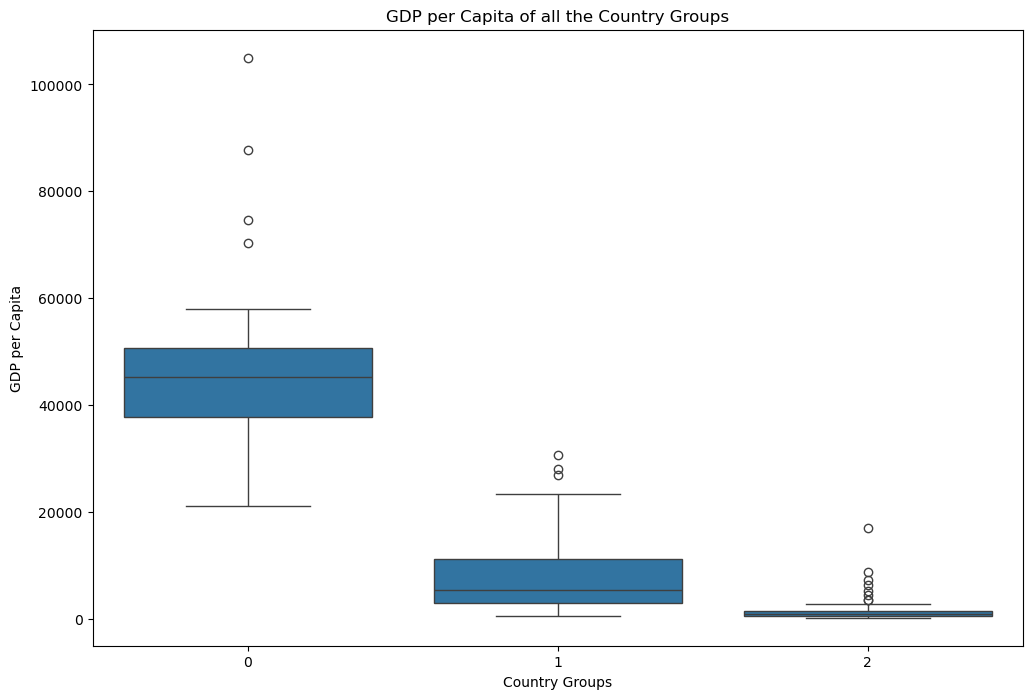

In [81]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdpp',data=df5)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()

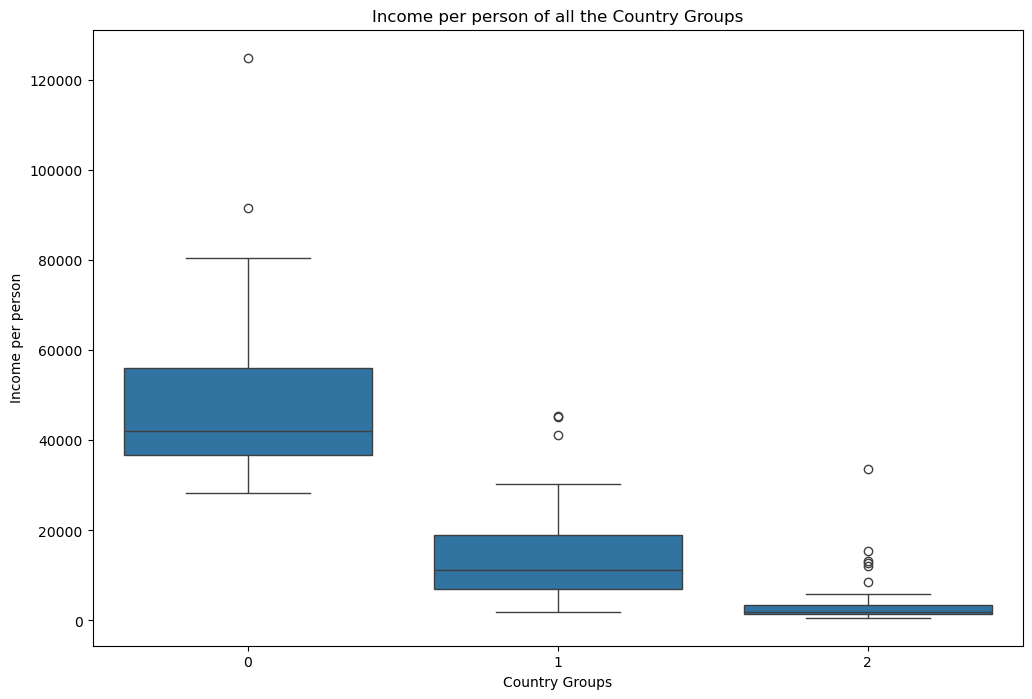

In [83]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='income',data=df5)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Income per person of all the Country Groups')
plt.show()


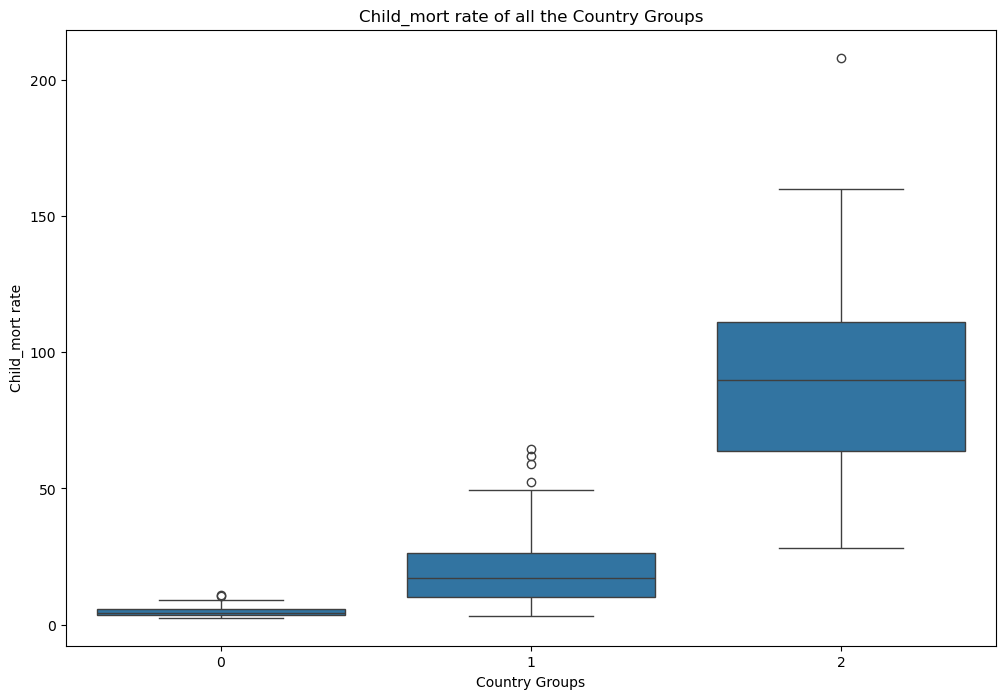

In [84]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='child_mort',data=df5)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.title('Child_mort rate of all the Country Groups')
plt.show()

In [85]:
Developed_con_K=df5[df5['ClusterID']==0]
Avg_Developed_con_K=df5[df5['ClusterID']==1]
Poor_con_K=df5[df5['ClusterID']==2]

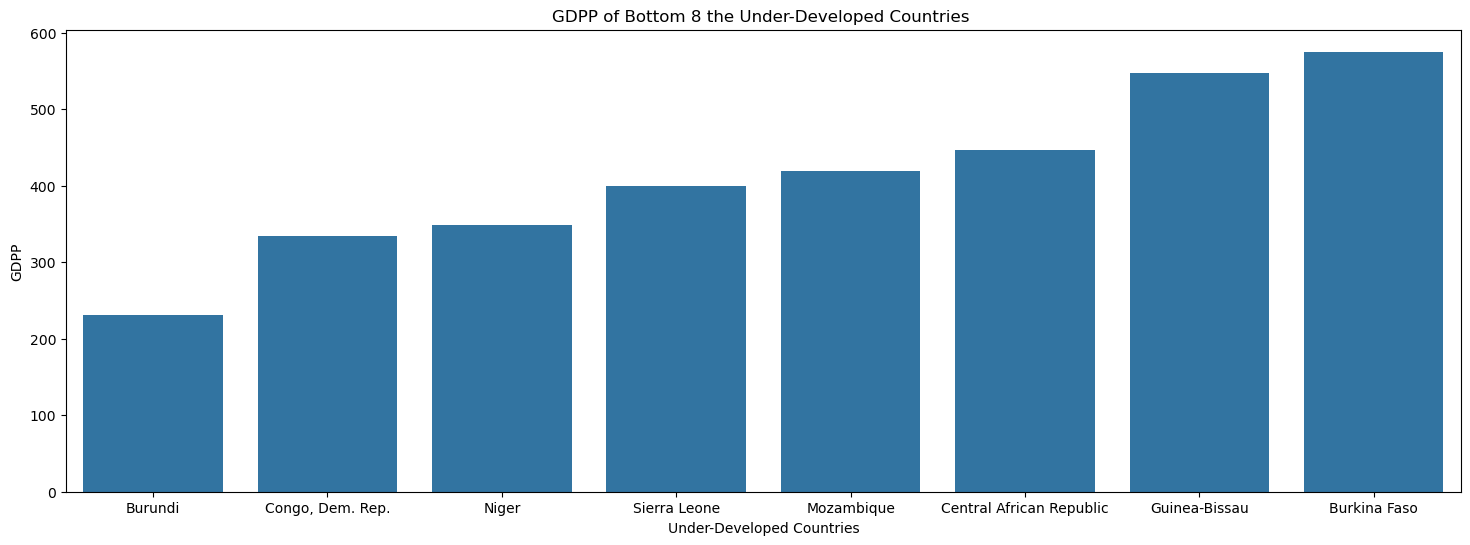

In [86]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='gdpp',data=fin_k.nsmallest(8,'gdpp'))
plt.title('GDPP of Bottom 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.show()

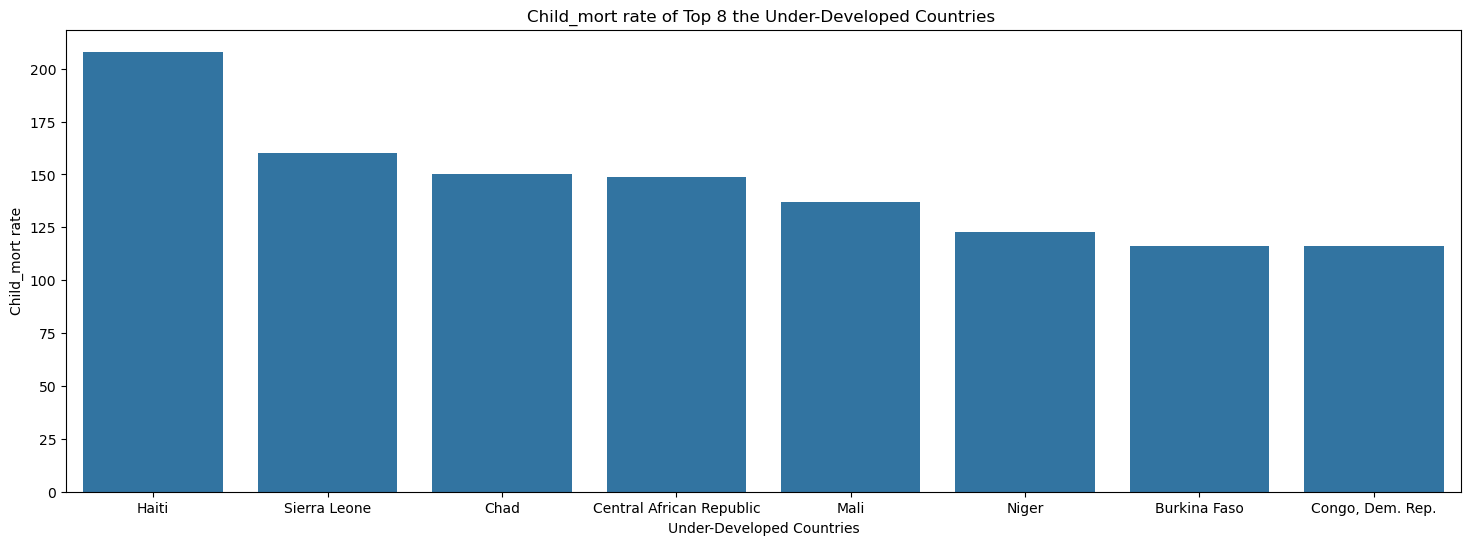

In [87]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='child_mort',data=fin_k.nlargest(8,'child_mort'))
plt.title('Child_mort rate of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.show()

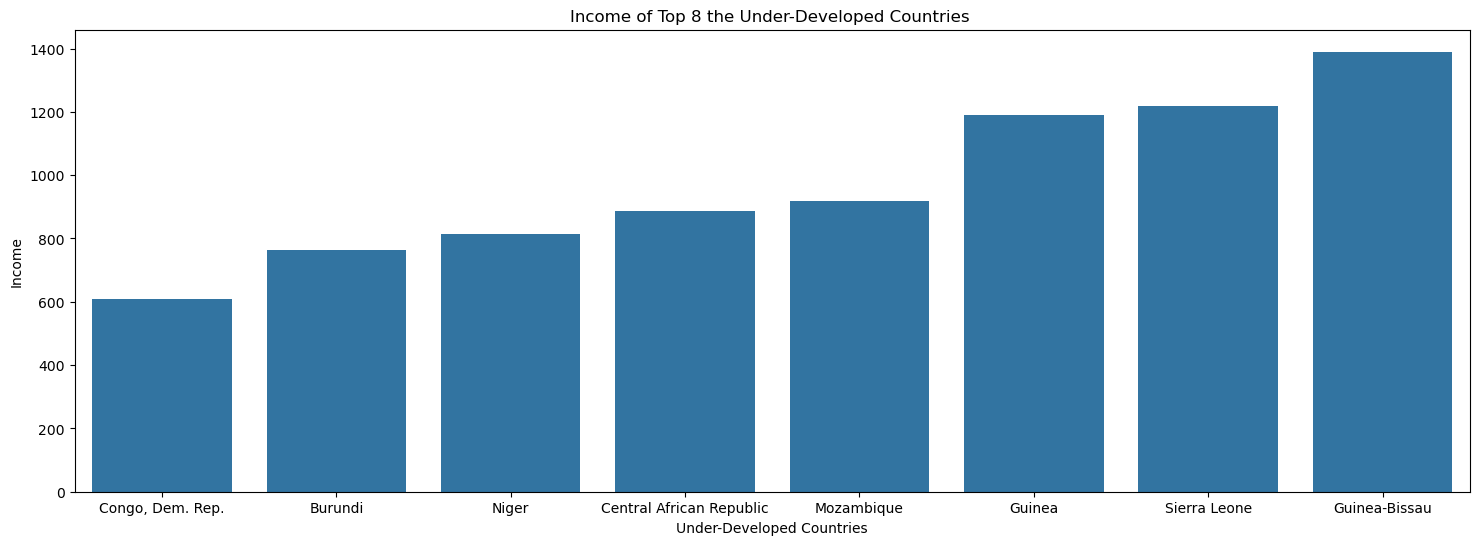

In [88]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='income',data=fin_k.nsmallest(8,'income'))
plt.title('Income of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()